In [ ]:
# http://archive.ics.uci.edu/ml/datasets/heterogeneity+activity+recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pickle
import torch
import optuna

In [5]:
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

# F1 score of Retrain with LOO and Retrain with Singleton
channels=['accel_x',"accel_y","accel_z","gyro_x", "gyro_y", "gyro_z"]
dir_path= "./experiments/HHAR/"
epochs=50

f1_list=[]
i=0; j=0
for select in ["LOO", "singleton"]:
    for channel in channels:

        dictionary= pickle.load(
            open(
                os.path.join(
                    dir_path,channel,
                    select,
                    "dictionary",
                    f"userfold-{select}-v_dict-e{epochs}.pkl"
                ), "rb"
            ) 
        )
        f1_list.append(dictionary["macro avg"]['f1-score'])
        j += 1
    i += 1; j=0
    


In [6]:
#F1 Score
string=""
labels={0:'accel_x',1:"gyro_y",2:"gyro_x",3:"gyro_z",4:"accel_y",5:"accel_z"}
for i in f1_list[:len(labels)]:
    string += str(round(i,4))
    string += " & "
print("LOO: ", string)

string=""
for i in f1_list[len(labels):]:
    string += str(round(i,4))
    string += " & "
print("Singleton: ", string)

LOO:  0.6187 & 0.7633 & 0.7363 & 0.7448 & 0.766 & 0.7485 & 
Singleton:  0.7633 & 0.6187 & 0.7448 & 0.766 & 0.7485 & 0.7363 & 


In [12]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# baseline F1 socre


folder_dict={"Baseline":"Baseline"}
channels=['accel_x',"accel_y","accel_z","gyro_x", "gyro_y", "gyro_z"]
participants=['a','b','c','d','e','f','g','h','i']
model="Baseline"
epochs=50
runs=5
classes=6


data_dir="phone/original-minmax/"
avg_acc=[]
baseline_f1=[]
class_acc=[]

print("Classes: 0 & 1 & 2 & 3 & 4 & 5")
print()
i=1; j=0
for folder in range(runs):
    dictionary_dir= f"./experiments/HHAR/exp_log{folder}/{data_dir}{folder_dict[model]}/dictionary"
    
    for p in participants:
        dictionary= pickle.load(open(f"{dictionary_dir}/userfold-{model}-dictionary-fold{p}-e{epochs}.pkl","rb"))
        avg_acc.append(dictionary["macro avg"]["f1-score"])
        baseline_f1.append(dictionary["macro avg"]["f1-score"])
        
        tmp=[]
        for c in range(classes):
            tmp.append(round(dictionary[str(c)]['f1-score'],4))
        class_acc.append(tmp)

    class_str= ""
    for i in tmp:
        class_str+=f"{i} & "
    print(class_str)
    print(f"Avg: {round(dictionary['macro avg']['f1-score'],4)}")
print()
print("Overall Avg")
print(round(np.mean(avg_acc), 4))


Classes: 0 & 1 & 2 & 3 & 4 & 5

0.7365 & 0.714 & 0.4547 & 0.8555 & 0.7869 & 0.5687 & 
Avg: 0.6861
0.6651 & 0.7073 & 0.1719 & 0.8679 & 0.6183 & 0.4618 & 
Avg: 0.5821
0.7861 & 0.6876 & 0.0477 & 0.752 & 0.6092 & 0.5615 & 
Avg: 0.574
0.714 & 0.6884 & 0.0407 & 0.8517 & 0.6702 & 0.6481 & 
Avg: 0.6022
0.7002 & 0.6933 & 0.0789 & 0.8433 & 0.7347 & 0.3776 & 
Avg: 0.5713

Overall Avg
0.7745


In [15]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Element wise Multiplication

folder_dict={"DF":"DF", "NFS":"NFS","Weight":"Weight", "Grad":"Grad"}
channels=['accel_x',"accel_y","accel_z","gyro_x", "gyro_y", "gyro_z"]
participants=['a','b','c','d','e','f','g','h','i']
model="Grad"
epochs=50
runs=5
classes=6

data_dir="phone/original-minmax/"
avg_acc=[]
method_f1=[]
class_acc=[]

i=1; j=0
print("Classes: 0 & 1 & 2 & 3 & 4 & 5")
print()
for folder in range(runs):
    dictionary_dir= f"./experiments/HHAR/exp_log{folder}/{data_dir}{folder_dict[model]}/dictionary"
    
    for p in participants:
        dictionary= pickle.load(open(f"{dictionary_dir}/userfold-{model}-dictionary-fold{p}-e{epochs}.pkl","rb"))
        avg_acc.append(dictionary["macro avg"]["f1-score"])
        method_f1.append(dictionary["macro avg"]["f1-score"])
        
        tmp=[]
        for c in range(classes):
            tmp.append(round(dictionary[str(c)]['f1-score'],4))
        class_acc.append(tmp)
        
    class_str= ""
    for i in tmp:
        class_str+=f"{i} & "
    print(class_str)
    print(f"Avg: {round(dictionary['macro avg']['f1-score'],4)}")
print()
print("Overall Avg")
print(round(np.mean(avg_acc), 4))

Classes: 0 & 1 & 2 & 3 & 4 & 5

0.7204 & 0.7781 & 0.5209 & 0.842 & 0.5774 & 0.6554 & 
Avg: 0.6824
0.7603 & 0.699 & 0.2959 & 0.844 & 0.7197 & 0.6593 & 
Avg: 0.6631
0.7144 & 0.6426 & 0.0975 & 0.8572 & 0.7436 & 0.6619 & 
Avg: 0.6195
0.6351 & 0.6539 & 0.0849 & 0.8339 & 0.5721 & 0.3832 & 
Avg: 0.5272
0.6621 & 0.6338 & 0.0208 & 0.7755 & 0.4945 & 0.5152 & 
Avg: 0.517

Overall Avg
0.7698


In [16]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Hardamard Product

folder_dict={"DF":"DF", "NFS":"NFS","Weight":"Weight", "Grad":"Grad"}
channels=['accel_x',"accel_y","accel_z","gyro_x", "gyro_y", "gyro_z"]
participants=['a','b','c','d','e','f','g','h','i']
model="Grad"
epochs=50
runs=5
classes=6

data_dir="phone/original-minmax/"
avg_acc=[]
method_multivar_f1=[]
class_acc=[]

i=1; j=0
print("Classes: 0 & 1 & 2 & 3 & 4 & 5")
for folder in range(runs):
    dictionary_dir= f"./experiments/HHAR/exp_log{folder}/{data_dir}{folder_dict[model]}/dictionary"
    
    for p in participants:
        dictionary= pickle.load(open(f"{dictionary_dir}/userfold-multivar-{model}-dictionary-fold{p}-e{epochs}.pkl","rb"))
        avg_acc.append(dictionary["macro avg"]["f1-score"])
        method_multivar_f1.append(dictionary["macro avg"]["f1-score"])
        
        tmp=[]
        for c in range(classes):
            tmp.append(round(dictionary[str(c)]['f1-score'],4))
        class_acc.append(tmp)

    class_str= ""
    for i in tmp:
        class_str+=f"{i} & "
    print(class_str)
    print(f"Avg: {round(dictionary['macro avg']['f1-score'],4)}")
print()
print("Overall Avg")
print(round(np.mean(avg_acc), 4))

Classes: 0 & 1 & 2 & 3 & 4 & 5
0.7279 & 0.6907 & 0.031 & 0.8808 & 0.8089 & 0.536 & 
Avg: 0.6126
0.7033 & 0.6441 & 0.1443 & 0.8241 & 0.639 & 0.6007 & 
Avg: 0.5926
0.654 & 0.6502 & 0.0704 & 0.8682 & 0.61 & 0.431 & 
Avg: 0.5473
0.7474 & 0.8497 & 0.7304 & 0.8428 & 0.6567 & 0.693 & 
Avg: 0.7533
0.7439 & 0.8785 & 0.8267 & 0.8638 & 0.782 & 0.5618 & 
Avg: 0.7761

Overall Avg
0.7755


In [135]:
from scipy.stats import ttest_ind

if 0.5< np.std(method_f1)/ np.std(baseline_f1) < 2:
    res= ttest_ind(method_f1, baseline_f1)
else:
    res= ttest_ind(method_f1, baseline_f1, equal_var=False)


if 0.5< np.std(method_multivar_f1)/ np.std(baseline_f1) < 2:
    multi_res= ttest_ind(method_multivar_f1, baseline_f1)
else:
    multi_res= ttest_ind(method_multivar_f1, baseline_f1, equal_var=False)

print("Element wise Multiplication", res)
print("Hardmard Product", multi_res)

series Ttest_indResult(statistic=-0.2106987814608613, pvalue=0.8336094475766259)
multivar Ttest_indResult(statistic=0.04463611286064077, pvalue=0.964498489447092)


In [3]:
# Holm Correction
from statsmodels.stats.multitest import multipletests
multipletests([0.8336094475766259, 0.964498489447092], alpha=0.05,method="holm")

(array([False, False]), array([1., 1.]), 0.025320565519103666, 0.025)

In [ ]:
# Baseline F1: 0.7745

# DF Element wise Multiplication F1: 0.4911
# DF Hardmard Product F1: 0.058

# NFS Element wise Multiplication F1: 0.7038
# T-Test with baseline: (statistic=-3.122715716271208, pvalue=0.0024254384421769893)
# Holm Correction p-value: 0.025320565519103666
# NFS Hardmard Product F1: 0.7079
# T-Test with baseline: (statistic=-2.9645159282212337, pvalue=0.003900366433655399)
# Holm Correction p-value: 0.025

# Weight-Naive Element wise Multiplication F1: 0.7682
# T-Test with baseline: (statistic=-0.2839576214964432, pvalue=0.777109902428835)
# Holm Correction p-value: 1.0
# Weight-Naive Hardmard Product F1: 0.7771
# T-Test with baseline: (statistic=0.11977534102512569, pvalue=0.9049341420941137)
# Holm Correction p-value: 1.0

# Grad profile Element wise Multiplication F1: 0.7698
# T-Test with baseline: (statistic=-0.2106987814608613, pvalue=0.8336094475766259)
# Holm Correction p-value: 1.0
# Grad profile Hardmard Product F1: 0.7755 
# T-Test with baseline: (statistic=0.04463611286064077, pvalue=0.964498489447092)
# Holm Correction p-value: 1.0

### Element wise Multiplication

In [23]:
# Relative Importance Estimate of Weight profile methods using Element wise Multiplication
from sklearn.preprocessing import MinMaxScaler
import pickle
import os
import numpy as np
import pandas as pd
ws=[]
folder_ws=[]

original_dict={"DF":"DF", "NFS":"NFS",
               "Weight":"Weight"} #folder: model
model="DF"
runs=5
participants= ['a','b','c','d','e','f','g','h','i']
dir_path= "./experiments/HHAR"
feat_path= "phone/original-minmax"

for model in original_dict.keys():
    folder_ws=[]
    for folder in range(runs):
        ws=[]
        for participant in participants:

            path= os.path.join(dir_path, f"exp_log{folder}",feat_path, original_dict[model], "weights", f"userfold-{model}-fold{participant}-w-e50.pkl")

            scaler= MinMaxScaler()
            w= pickle.load( open(path, "rb") )

            ws.append(w)
        ws= np.array(ws).mean(axis=0)
        ws= scaler.fit_transform(ws.reshape(-1,1)).reshape(-1)
        folder_ws.append(ws)
    folder_ws= np.array(folder_ws)

    if model=="Weight":
        iew_ws=pd.DataFrame(folder_ws).to_numpy()
    elif model=="DF":
        df_ws=pd.DataFrame(folder_ws).to_numpy()
    elif model=="NFS":
        nfs_ws=pd.DataFrame(folder_ws).to_numpy()

Text(0.5, 24.296875, 'Channels')

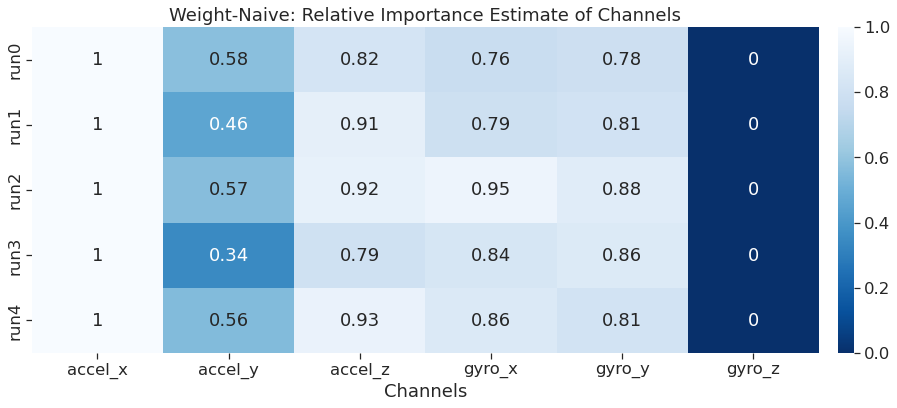

In [141]:
# Relative Importance Estimate of a Weight profile method using Element wise Multiplication
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=['accel_x',"accel_y","accel_z","gyro_x", "gyro_y", "gyro_z"]
plt.rc("font", size=15)
sns.set(font_scale=1.5)
plt.figure(figsize=(17,6))
ax= sns.heatmap(pd.DataFrame(folder_ws), 
            xticklabels=x_labels, 
            yticklabels=[ f"run{i}" for i in range(runs)], 
            annot=True, cbar_kws={"pad":0.02}, cmap="Blues_r")
ax.tick_params(left=True, bottom=True)
if model=="Weight":
    model="Weight-Naive"
plt.title(model+": Relative Importance Estimate of Channels")
plt.xlabel("Channels")

In [25]:
# Relative Importance Estimate of data channels via Element wise Multiplication of 
# the gradient profile method: Grad-AUC
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np

runs=5
model= "Grad-AUC"
folder_dictionary=[]
channels=['accel_x',"accel_y","accel_z","gyro_x", "gyro_y", "gyro_z"]

participants= ['a','b','c','d','e','f','g','h','i']
dir_path= "./experiments/HHAR"
feat_path= "phone/original-minmax"
epochs= 50
for folder in range(runs):
    avg_dictionary={}
    for i in channels:
        avg_dictionary[i]= []
    
    for participant in participants:
        path= os.path.join(dir_path, f"exp_log{folder}",feat_path, "Grad", "list", f"userfold-fold{participant}-grads-e50.pkl")

        grads= pickle.load(open(path,"rb"))
        grad_all= np.array(grads).reshape(epochs,-1,len(channels))

        epoch= return_epoch_stat(grad_all, "sum")
        dictionary={}

        scaler= MinMaxScaler()

        for idx, name in zip(range(len(channels)), channels):
            dictionary[name]= np.trapz(abs(epoch[:, idx]))
            
            
        scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))

        for key in dictionary.keys():
            dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
            avg_dictionary[key].append(dictionary[key])
            
    for key, value in avg_dictionary.items():
        avg_dictionary[key]= np.array(value).mean()
    folder_dictionary.append(avg_dictionary)
    
grad_auc_gs= pd.DataFrame(folder_dictionary).to_numpy()

In [26]:
# Relative Importance Estimate of data channels via Element wise Multiplication of 
# the gradient profile method: Grad-ROC
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np

runs=5
model= "Grad-ROC"
folder_dictionary=[]
channels=['accel_x',"accel_y","accel_z","gyro_x", "gyro_y", "gyro_z"]

participants= ['a','b','c','d','e','f','g','h','i']
dir_path= "./experiments/HHAR"
feat_path= "phone/original-minmax"
epochs= 50
for folder in range(runs):
    avg_dictionary={}
    for i in channels:
        avg_dictionary[i]= []
    
    for participant in participants:
        path= os.path.join(dir_path, f"exp_log{folder}",feat_path, "Grad", "list", f"userfold-fold{participant}-grads-e50.pkl")

        grads= pickle.load(open(path,"rb"))
        grad_all= np.array(grads).reshape(epochs,-1,len(channels))

        epoch= return_epoch_stat(grad_all, "sum")
        dictionary={}

        scaler= MinMaxScaler()

        for idx, name in zip(range(len(channels)), channels):
                rolled= np.roll( epoch[:, idx], 1 )
                rolled[0]=0.
                diff= epoch[:, idx]-rolled
                dictionary[channels[idx]]= np.trapz(abs(diff))
            
            
        scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))

        for key in dictionary.keys():
            dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
            avg_dictionary[key].append(dictionary[key])
            
    for key, value in avg_dictionary.items():
        avg_dictionary[key]= np.array(value).mean()
    folder_dictionary.append(avg_dictionary)
    
grad_roc_gs= pd.DataFrame(folder_dictionary).to_numpy()

In [27]:
# Relative Importance Estimate of data channels via Element wise Multiplication of 
# the gradient profile method: Grad-STD
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np

runs=5
model= "Grad-STD"
folder_dictionary=[]
channels=['accel_x',"accel_y","accel_z","gyro_x", "gyro_y", "gyro_z"]

participants= ['a','b','c','d','e','f','g','h','i']
dir_path= "./experiments/HHAR"
feat_path= "phone/original-minmax"
epochs= 50
for folder in range(runs):
    avg_dictionary={}
    for i in channels:
        avg_dictionary[i]= []
    
    for participant in participants:
        path= os.path.join(dir_path, f"exp_log{folder}",feat_path, "Grad", "list", f"userfold-fold{participant}-grads-e50.pkl")

        grads= pickle.load(open(path,"rb"))
        grad_all= np.array(grads).reshape(epochs,-1,len(channels))

        epoch= return_epoch_stat(grad_all, "std")
        dictionary={}

        scaler= MinMaxScaler()

        for idx, name in zip(range(len(channels)), channels):
            dictionary[name]= np.trapz(abs(epoch[:, idx]))
            
            
        scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))

        for key in dictionary.keys():
            dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
            avg_dictionary[key].append(dictionary[key])
            
    for key, value in avg_dictionary.items():
        avg_dictionary[key]= np.array(value).mean()
    folder_dictionary.append(avg_dictionary)

grad_std_gs= pd.DataFrame(folder_dictionary).to_numpy()

Text(0.5, 24.296875, 'Channels')

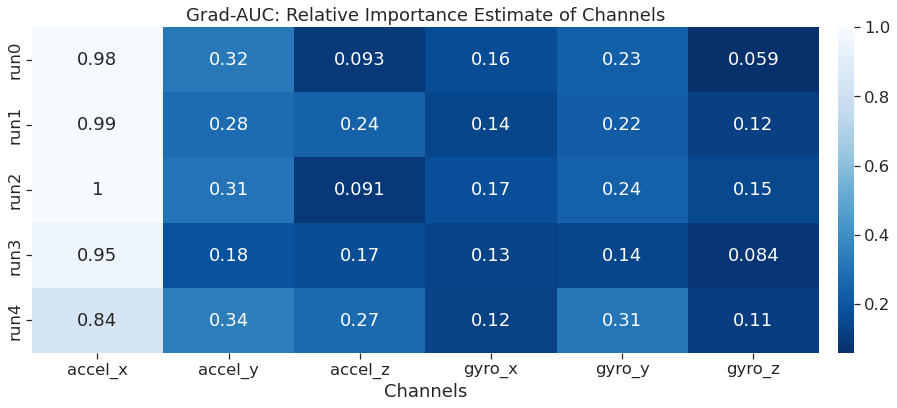

In [110]:
# Relative Importance Estimate of a Gradient profile method using Element wise Multiplication
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,6))
ax= sns.heatmap(pd.DataFrame(folder_dictionary), 
            xticklabels=channels, 
            yticklabels=[f"run{i}" for i in range(runs)], 
            annot=True, cbar_kws={"pad":0.02}, cmap="Blues_r")
ax.tick_params(left=True, bottom=True)
plt.title(f"{model}: Relative Importance Estimate of Channels")
plt.xlabel("Channels")

### Hardmard Product

In [24]:
# Relative Importance Estimate of Weight profile methods using Hardmard Product
from sklearn.preprocessing import MinMaxScaler
import pickle
import os
ws=[]
folder_ws=[]

original_dict={"DF":"DF", "NFS":"NFS",
               "Weight":"Weight"} #folder: model
model="NFS"
runs=5
participants= ['a','b','c','d','e','f','g','h','i']
dir_path= "./experiments/HHAR"
feat_path= "phone/original-minmax"

for model in original_dict.keys():
    folder_ws=[]
    for folder in range(runs):
        ws=[]
        for participant in participants:

            path= os.path.join(dir_path, f"exp_log{folder}",feat_path, original_dict[model], "weights", f"userfold-multivar-{model}-fold{participant}-w-e50.pkl")

            scaler= MinMaxScaler()
            w= pickle.load( open(path, "rb") )

            ws.append(w.sum(axis=0))
        ws= np.array(ws).mean(axis=0)
        ws= scaler.fit_transform(ws.reshape(-1,1)).reshape(-1)
        folder_ws.append(ws)
    folder_ws= np.array(folder_ws)

    if model=="Weight":
        iew_ahp_ws=pd.DataFrame(folder_ws).to_numpy()
    elif model=="DF":
        df_ahp_ws=pd.DataFrame(folder_ws).to_numpy()
    elif model=="NFS":
        nfs_ahp_ws=pd.DataFrame(folder_ws).to_numpy()

Text(0.5, 24.296875, 'Channels')

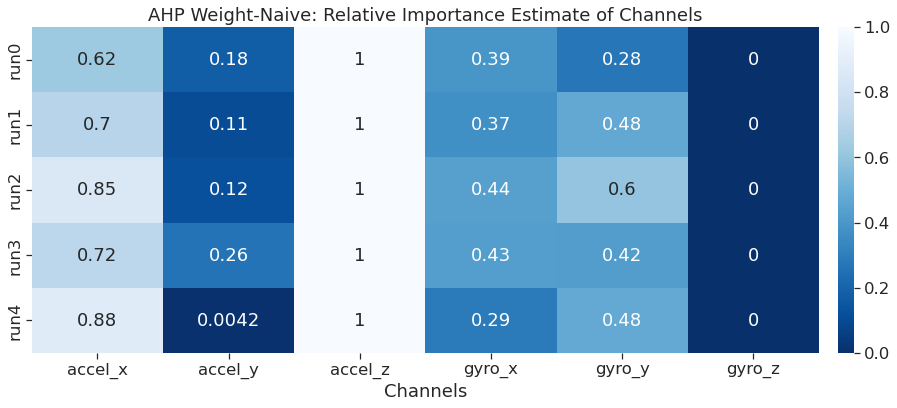

In [143]:
# Relative Importance Estimate of a Weight profile method using Hardmard Product
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=['accel_x',"accel_y","accel_z","gyro_x", "gyro_y", "gyro_z"]
plt.figure(figsize=(17,6))
ax= sns.heatmap(pd.DataFrame(folder_ws), 
            xticklabels=x_labels, 
            yticklabels=[ f"run{i}" for i in range(runs)], 
            annot=True, cbar_kws={"pad":0.02}, cmap="Blues_r")
ax.tick_params(left=True, bottom=True)
if model=="Weight":
    model="Weight-Naive"
plt.title(f"AHP {model}: Relative Importance Estimate of Channels")
plt.xlabel("Channels")

In [28]:
# Relative Importance Estimate of data channels via Aggregated Hardmard Product of 
# the gradient profile method: Grad-AUC
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler

runs=5
model= "Grad-AUC"
folder_dictionary=[]
channels=['accel_x',"accel_y","accel_z","gyro_x", "gyro_y", "gyro_z"]

participants= ['a','b','c','d','e','f','g','h','i']
dir_path= "./experiments/HHAR"
feat_path= "phone/original-minmax"
epochs= 50
for folder in range(runs):
    avg_dictionary={}
    for i in channels:
        avg_dictionary[i]= []
    
    for participant in participants:
        path= os.path.join(dir_path, f"exp_log{folder}",feat_path, "Grad", "list", f"userfold-fold{participant}-multivar-epoch_sum-e50.pkl")
        epoch= pickle.load(open(path,"rb"))
        dictionary={}

        scaler= MinMaxScaler()
            
        for idx, name in zip(range(len(channels)), channels):
            dictionary[name]= np.trapz(abs(epoch[:, :, idx]), axis=0).sum()
            scaler.partial_fit(dictionary[name].reshape(-1,1))
            

        for key in dictionary.keys():
            dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
            avg_dictionary[key].append(dictionary[key])
            
    for key, value in avg_dictionary.items():
        avg_dictionary[key]= np.array(value).mean()
    folder_dictionary.append(avg_dictionary)

grad_auc_ahp_gs= pd.DataFrame(folder_dictionary).to_numpy()

In [29]:
# Relative Importance Estimate of data channels via Element wise Multiplication of 
# the gradient profile method: Grad-ROC
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler

runs=5
model= "Grad-ROC"
folder_dictionary=[]
channels=['accel_x',"accel_y","accel_z","gyro_x", "gyro_y", "gyro_z"]

participants= ['a','b','c','d','e','f','g','h','i']
dir_path= "./experiments/HHAR"
feat_path= "phone/original-minmax"
epochs= 50
for folder in range(runs):
    avg_dictionary={}
    for i in channels:
        avg_dictionary[i]= []
    
    for participant in participants:
        path= os.path.join(dir_path, f"exp_log{folder}",feat_path, "Grad", "list", f"userfold-fold{participant}-multivar-epoch_sum-e50.pkl")

        epoch= pickle.load(open(path,"rb"))
        dictionary={}

        scaler= MinMaxScaler()
            
        for idx, name in zip(range(len(channels)), channels):
            rolled= np.roll( epoch[:,:, idx], 1 )
            rolled[0]=0.
            diff= epoch[:,:, idx]-rolled
            dictionary[channels[idx]]= np.trapz(abs(diff), axis=0).sum()
            scaler.partial_fit(dictionary[name].reshape(-1,1))
            

        for key in dictionary.keys():
            dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
            avg_dictionary[key].append(dictionary[key])
            
    for key, value in avg_dictionary.items():
        avg_dictionary[key]= np.array(value).mean()
    folder_dictionary.append(avg_dictionary)

grad_roc_ahp_gs= pd.DataFrame(folder_dictionary).to_numpy()

In [30]:
# Relative Importance Estimate of data channels via Element wise Multiplication of 
# the gradient profile method: Grad-STD
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler

runs=5
model= "Grad-STD"
folder_dictionary=[]
channels=['accel_x',"accel_y","accel_z","gyro_x", "gyro_y", "gyro_z"]

participants= ['a','b','c','d','e','f','g','h','i']
dir_path= "./experiments/HHAR"
feat_path= "phone/original-minmax"
epochs= 50
for folder in range(runs):
    avg_dictionary={}
    for i in channels:
        avg_dictionary[i]= []
    
    for participant in participants:
        path= os.path.join(dir_path, f"exp_log{folder}",feat_path, "Grad", "list", f"userfold-fold{participant}-multivar-epoch_std-e50.pkl")

        epoch= pickle.load(open(path,"rb"))
        dictionary={}

        scaler= MinMaxScaler()
            
        for idx, name in zip(range(len(channels)), channels):
            dictionary[name]= np.trapz(abs(epoch[:, :, idx]), axis=0).sum()
            scaler.partial_fit(dictionary[name].reshape(-1,1))
            

        for key in dictionary.keys():
            dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
            avg_dictionary[key].append(dictionary[key])
            
    for key, value in avg_dictionary.items():
        avg_dictionary[key]= np.array(value).mean()
    folder_dictionary.append(avg_dictionary)

grad_std_ahp_gs= pd.DataFrame(folder_dictionary).to_numpy()

Text(0.5, 24.296875, 'Channels')

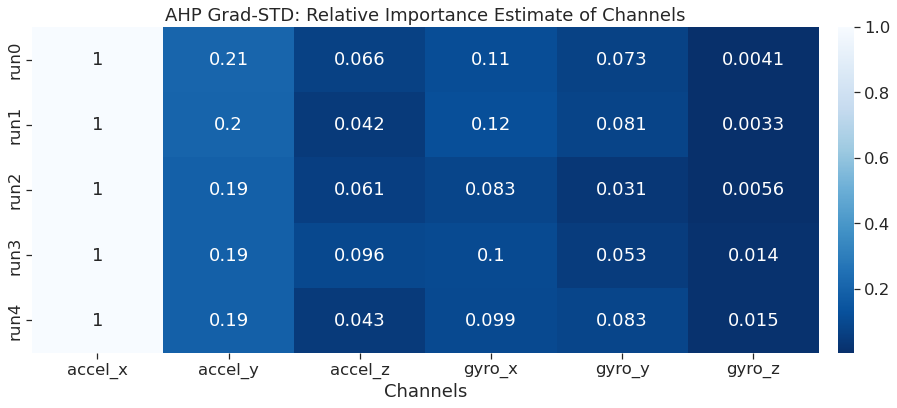

In [122]:
# Relative Importance Estimate of a Gradient profile method using Hardmard Product
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,6))
ax= sns.heatmap(pd.DataFrame(folder_dictionary), 
            xticklabels=channels, 
            yticklabels=[f"run{i}" for i in range(runs)], 
            annot=True, cbar_kws={"pad":0.02}, cmap="Blues_r")
ax.tick_params(left=True, bottom=True)
plt.title(f"AHP {model}: Relative Importance Estimate of Channels")
plt.xlabel("Channels")

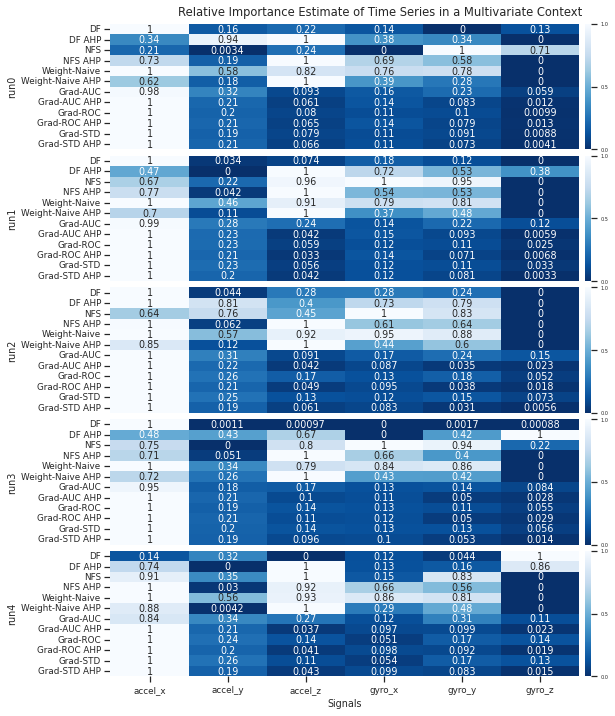

In [34]:
# Relative Importance Estimate of Time Series in a Multivariate Context 
# (using Element wise Multiplication and Aggregated Hardmard Product)
plot_ws=[
    df_ws[0],
    df_ahp_ws[0],
    nfs_ws[0],
    nfs_ahp_ws[0],
    iew_ws[0],
    iew_ahp_ws[0],
    grad_auc_gs[0],
    grad_auc_ahp_gs[0],
    grad_roc_gs[0],
    grad_roc_ahp_gs[0],
    grad_std_gs[0],
    grad_std_ahp_gs[0],
    df_ws[1],
    df_ahp_ws[1],
    nfs_ws[1],
    nfs_ahp_ws[1],
    iew_ws[1],
    iew_ahp_ws[1],
    grad_auc_gs[1],
    grad_auc_ahp_gs[1],
    grad_roc_gs[1],
    grad_roc_ahp_gs[1],
    grad_std_gs[1],
    grad_std_ahp_gs[1],
    df_ws[2],
    df_ahp_ws[2],
    nfs_ws[2],
    nfs_ahp_ws[2],
    iew_ws[2],
    iew_ahp_ws[2],
    grad_auc_gs[2],
    grad_auc_ahp_gs[2],
    grad_roc_gs[2],
    grad_roc_ahp_gs[2],
    grad_std_gs[2],
    grad_std_ahp_gs[2],
    df_ws[3],
    df_ahp_ws[3],
    nfs_ws[3],
    nfs_ahp_ws[3],
    iew_ws[3],
    iew_ahp_ws[3],
    grad_auc_gs[3],
    grad_auc_ahp_gs[3],
    grad_roc_gs[3],
    grad_roc_ahp_gs[3],
    grad_std_gs[3],
    grad_std_ahp_gs[3],
    df_ws[4],
    df_ahp_ws[4],
    nfs_ws[4],
    nfs_ahp_ws[4],
    iew_ws[4],
    iew_ahp_ws[4],
    grad_auc_gs[4],
    grad_auc_ahp_gs[4],
    grad_roc_gs[4],
    grad_roc_ahp_gs[4],
    grad_std_gs[4],
    grad_std_ahp_gs[4],
]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=  channels
y_labels= ["DF", "DF AHP",
           "NFS", "NFS AHP",
           "Weight-Naive", "Weight-Naive AHP",
           "Grad-AUC", "Grad-AUC AHP", 
           "Grad-ROC", "Grad-ROC AHP",
           "Grad-STD", "Grad-STD AHP"
          ]
sns.set(font_scale=0.8)
aspect=15

fig, ax = plt.subplots(5,1)
fig.set_figheight(12)
fig.set_figwidth(10)

start=0
end=start+6*2
for i in range(4):

    sns.heatmap(
        pd.DataFrame(plot_ws[start:end]),
        yticklabels=y_labels,
        annot=True, cmap="Blues_r", ax=ax[i],cbar=True,
        cbar_kws={"pad":0.01,"ticks":[0,0.5,1.0]}
    )

    ax[i].set_xticks([])

    ax[i].set_ylabel(f"run{i}")
    ax[i].tick_params(left=True) 
    ax[i].collections[0].colorbar.ax.tick_params(labelsize=5)
    ax[i].tick_params(axis='y', labelrotation=0)

    start += 6*2
    end += 6*2

sns.heatmap(
    pd.DataFrame(plot_ws[start:]),
    xticklabels=x_labels, #"auto"
    yticklabels=y_labels, 
    annot=True, cmap="Blues_r",ax=ax[-1],cbar=True, 
    cbar_kws={"pad":0.01, "ticks":[0,0.5,1.0]}
)

ax[-1].set_ylabel("run4")
ax[-1].tick_params(left=True, bottom=True)
ax[-1].collections[0].colorbar.ax.tick_params(labelsize=5)
ax[-1].tick_params(axis='y', labelrotation=0)

ax[-1].set_xlabel("Signals")
if model=="Weight":
    model="Weight-Naive"
fig.suptitle(
    "Relative Importance Estimate of Time Series in a Multivariate Context",
    y=0.9
)

fig.subplots_adjust(wspace=0, hspace=0.05)
# plt.tight_layout()